In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
housing = pd.read_csv('Melbourne_housing_FULL.csv')
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [4]:
#change Postcode
housing['Postcode']= housing['Postcode'].astype('object')
#change Propertycount to category
housing['Propertycount']= housing['Propertycount'].astype('object')

In [5]:
housing= housing.drop(['Bedroom2'], axis=1)

In [6]:
#check basic statistics
housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.000000,2.724700e+04,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


In [7]:
#use the unary operator ~ to delete the rows
housing = housing[~(housing['BuildingArea'] < 1)]  
#check the deletion
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

0

In [8]:
housing = housing.reset_index()

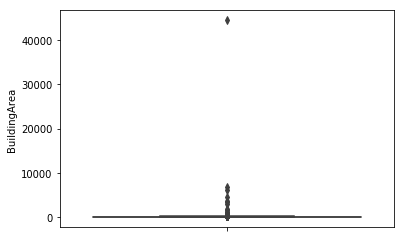

In [9]:
sns.boxplot(data = housing, y = 'BuildingArea')

In [10]:
housing.loc[housing.BuildingArea>40000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22614,22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,...,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849


In [11]:
#replace outlier building area
housing['BuildingArea'].replace(44515.0, 445, inplace=True)

In [12]:
# check missing data
housing.isnull().sum()

index                0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
housing['Price']= housing['Price'].fillna(housing['Price'].median())
housing['Landsize']= housing['Landsize'].fillna(housing['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
housing['Distance'] = housing['Distance'].fillna(housing['Distance'].median())
housing['BuildingArea']= housing['BuildingArea'].fillna(housing['BuildingArea'].median())
housing['Lattitude']= housing['Lattitude'].fillna(housing['Lattitude'].median())
housing['Longtitude']= housing['Longtitude'].fillna(housing['Longtitude'].median())
housing['YearBuilt']= housing['YearBuilt'].fillna(housing['YearBuilt'].median())
housing.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [15]:
housing['Bathroom']= housing['Bathroom'].fillna(housing['Bathroom'].mode()[0])
housing['Car']= housing['Car'].fillna(housing['Car'].mode()[0])
housing['CouncilArea']= housing['CouncilArea'].fillna(housing['CouncilArea'].mode()[0])
housing['Regionname']= housing['Regionname'].fillna(housing['Regionname'].mode()[0])
housing['Propertycount']= housing['Propertycount'].fillna(housing['Propertycount'].mode()[0])
housing['Postcode']= housing['Postcode'].fillna(housing['Postcode'].mode()[0])
housing.isnull().sum()

index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
housing['Bathroom'] = pd.to_numeric(housing['Bathroom']).round(0).astype(int)
housing['Car'] = pd.to_numeric(housing['Car']).round(0).astype(int)

## Feature engineering

In [17]:
housing['houseAge'] = 2018-housing['YearBuilt']

In [18]:
#create the new column data restructuring the original Date column with pd.to_datetime
housing['data'] = pd.to_datetime(housing['Date'])

In [19]:
# calculate day of year
housing['doy'] = housing['data'].dt.dayofyear
# Create year
housing['Year'] = housing['data'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in housing['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
housing['season']= pd.Series(daje)

## Machine learning

In [21]:
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=42)
housing = train_set.copy()

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24346 entries, 25999 to 15795
Data columns (total 26 columns):
index            24346 non-null int64
Suburb           24346 non-null object
Address          24346 non-null object
Rooms            24346 non-null int64
Type             24346 non-null object
Price            24346 non-null float64
Method           24346 non-null object
SellerG          24346 non-null object
Date             24346 non-null object
Distance         24346 non-null float64
Postcode         24346 non-null float64
Bathroom         24346 non-null int32
Car              24346 non-null int32
Landsize         24346 non-null float64
BuildingArea     24346 non-null float64
YearBuilt        24346 non-null float64
CouncilArea      24346 non-null object
Lattitude        24346 non-null float64
Longtitude       24346 non-null float64
Regionname       24346 non-null object
Propertycount    24346 non-null float64
houseAge         24346 non-null float64
data             24346 

In [23]:
#dummy variable
hD= pd.get_dummies(housing, columns= ['Type', 'Regionname', 'season'])

In [25]:
#drop useless variables
hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea',
            'YearBuilt', 'data', 'doy'], axis=1)
#check variables
hD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24346 entries, 25999 to 15795
Data columns (total 28 columns):
index                                    24346 non-null int64
Rooms                                    24346 non-null int64
Price                                    24346 non-null float64
Distance                                 24346 non-null float64
Bathroom                                 24346 non-null int32
Car                                      24346 non-null int32
Landsize                                 24346 non-null float64
BuildingArea                             24346 non-null float64
Lattitude                                24346 non-null float64
Longtitude                               24346 non-null float64
Propertycount                            24346 non-null float64
houseAge                                 24346 non-null float64
Year                                     24346 non-null int64
Type_h                                   24346 non-null uint8
Typ

In [26]:
#create x and y variables
X = hD.drop("Price", axis=1)
Y = hD["Price"].copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [28]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [29]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 448589.37
RMSE of random forest = 182252.36
RMSE of decision tree = 0.00


In [30]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 70.95 %
Accuracy of random forest= 90.12 %
Accuracy of decision tree= 100.00 %


## Model comparison

In [31]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [32]:
results[8]

{'fit_time': array([0.28224945, 0.26030183, 0.25431585, 0.26030278, 0.25731325,
        0.25529003, 0.24733806, 0.24733543, 0.24631643, 0.25833559]),
 'score_time': array([0.00196719, 0.0019908 , 0.00199556, 0.00199223, 0.00202346,
        0.00199437, 0.00302148, 0.00299191, 0.00199461, 0.00296855]),
 'test_score': array([-0.08725114,  0.05643757, -0.03226395, -0.00984529, -0.00365275,
         0.08077574,  0.13017936, -0.19670683,  0.04432017,  0.06987362]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [33]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [34]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,445848.649171,1.372784e+10,258640.631305,4449.038443,0.419268,0.042996
0,Linear Regression,449922.900598,1.892660e+10,285788.932068,7333.637365,0.389067,0.021464
2,Decision Trees,577998.644948,3.341703e+10,317394.098965,5403.721852,0.005187,0.089829
